# Practical plotting

A picture says more than a thousand words. And so I spend a substantial part of my time writing papers on creating visualizations. 

Scientific writing is often visual writing: it explains figures, diagrams and plots. 

We teach students how to write, but we don't teach them how to draw: how to visualize their ideas.

For me plotting means a lot of searching.
Hoping to find quick fixes for whatever plotting problem I might have, and then move on.
There's one thing I try to avoid at all cost: the documentation. 
But I could probably have save myself a lot of time by trying to understand a little bit better how matplotlib works.
And so these notebooks are notes to self: practical tips and tricks for working with matplotlib.

## Figure philosophy

A paper develops an argument, and the figures are the visual support. 
Quite often, the figures and their captions alone are enough to get a basic understanding of a paper.
Every figure therefore makes a point, has a take home message. 


### Questions to ask yourself


- What point does this figure make?
- Can you find all information required to understand that point in the figure or its caption?
- Is it clear to the reader what s/he is supposed to see in the plot?

### Some commandments

- **Be concise:** If you can make two points in one figure instead of two, use one.
- **Be consistent:** Make all figures consistent by sharing axes, colors, names, etc. as much as possible.
- **Be concrete:** Show as much of the underlying data as possible, as long as it does not obscure your main point. If the figure is an explanation, consider using one well-chosen example. 
- **Avoid clutter:** Get rid of all visual elements you don't need to understand the figure. 

### Figure text

To read a figure, you need text. These are the bare necessities:

- Legend
- X label: a quantity and unit (e.g. "length (m)")
- Y label: idem
- Title: a short, informative title (esp. with subplots)
- Caption: explain the reader what to see, how to see it, and why it matters.

## Practical tips

- **Write 1 function per subplot** to generate a single plot from input data. Pass `**kwargs` to the plotting function so you can later tweak the formatting. Later combine all subplots in one big plot.
- **Precompute plotted data.** If plotting involves a lot of computation, store the exact data required to generate a figure to a file. This allows you to tweak the formatting much faster.
- **Use the right dimensions.** Check the exact size available for your figure, and [specify it in inches](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html#): `figsize=(10/2.54, 5/2.54)` for a figure of width 10cm and height 5cm. This will ensure readability, and make font sizes consistent.
- **Save figures as PDFs.** Ensures 'lossless' typesetting, but also allows you to make final edits in vector graphics editors (e.g. Adobe Illustrator or Affinity Designer)
- **Don't automate everything.** Some things (such as annotations) are often easier to add or change in vector graphics editors.
- **Add text:** x/y labels, legend and a title (and perhaps even a caption in notebooks). After playing around with some data and finding one visualization useful, immediately add text. Someone might have to understand it later (that person might be yourself a month from now).

### Boilerplate

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
cm = 1/2.54

def title(text, ha='left', fontweight='bold', x=0, ax=None, **kwargs):
    if ax is None: ax = plt.gca()
    ax.set_title(text, x=x, ha=ha, fontweight=fontweight, **kwargs)
    
def despine(ax=None):
    if ax is None: ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

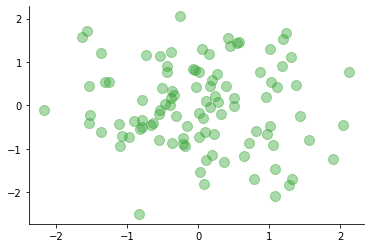

In [7]:
def plot_my_axis(data, ax=None, **kwargs):
    if ax == None: ax = plt.gca()
    props = dict(s=50, alpha=.4)
    props.update(kwargs)
    ax.scatter(data[:, 0], data[:, 1], **props)
    despine()
    
data = np.random.normal(size=(100, 2))
plot_my_axis(data, s=100, c='C2')

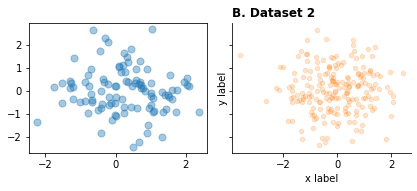

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
    figsize=(15*cm, 7*cm), 
    tight_layout=True, 
    sharey='all')

title('A. Dataset 1')
data1 = np.random.normal(size=(100, 2))
plot_my_axis(data1, ax=ax1)
plt.ylabel('y label')
plt.xlabel('x label');

title('B. Dataset 2')
data2 = np.random.normal(size=(200, 2))
plot_my_axis(data2, ax=ax2, s=20, alpha=.2, c='C1')
plt.xlabel('x label');

# plt.savefig('myfigure.pdf')

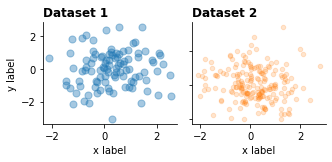

In [5]:
plt.figure(figsize=(12*cm, 6*cm), tight_layout=True)

plt.subplot(121)
title('Dataset 1')
data = np.random.normal(size=(100, 2))
plot_my_figure(data)
plt.ylabel('y label')
plt.xlabel('x label');

plt.subplot(122)
title('Dataset 2')
data = np.random.normal(size=(200, 2))
plot_my_figure(data, s=20, alpha=.2, c='C1')
plt.xlabel('x label');
plt.gca().set_yticklabels([]);

# plt.savefig('myfigure.pdf')